<a href="https://colab.research.google.com/github/VIJAYARAGUL362/NAIVE-BAYES-CLASSIFICATION/blob/main/NAIVE_BAYES_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING DATASET

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 18 - Naive Bayes/Python/Social_Network_Ads.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(y)


SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)

FEAUTURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform (x_train)
x_test=sc.transform(x_test)
print (x_train)
print (x_test)

TRAINING THE MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

PREDICTING THE TRAINING DATASET

In [ ]:
y_pred=classifier.predict(x_train)
p=np.concatenate((y_pred.reshape(len(y_pred),1),y_train.reshape(len(y_train),1)),axis=1)
print(p)

PREDICTING TEST DATASET

In [ ]:
classifier.predict(x_test)


CONFUSION MATRIX AND ACCURAACY STORE

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,classifier.predict(x_test))
print(cm)
accuracy_score(y_test,classifier.predict(x_test))



[[65  3]
 [ 7 25]]


0.9

K FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies)
accuracies.mean()
accuracies.std()

VISUALISING THE RESULT

<ipython-input-10-53875ddec825>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


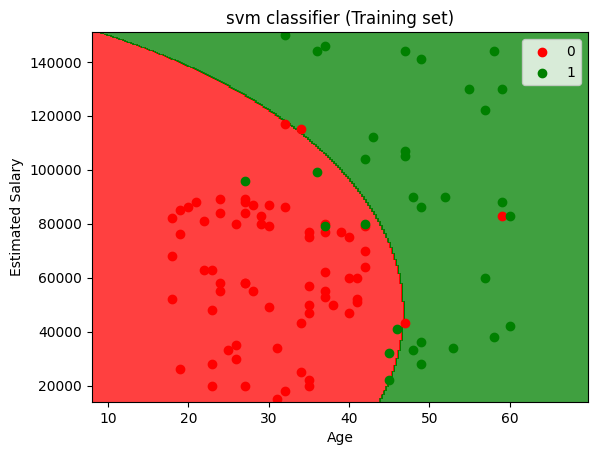

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('svm classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()